# Explore RNNs and their applications in sequence data (text classification for sentiment analysis dataset)


17464789/17464789 [==============================] - 4s 0us/step


Epoch 1/5


391/391 [==============================] - 9s 21ms/step - loss: 0.6839 - accuracy: 0.5463 - val_loss: 0.6602 - val_accuracy: 0.6027
Epoch 2/5
391/391 [==============================] - 13s 32ms/step - loss: 0.4680 - accuracy: 0.7828 - val_loss: 0.4538 - val_accuracy: 0.7997
Epoch 3/5
391/391 [==============================] - 9s 24ms/step - loss: 0.2839 - accuracy: 0.8869 - val_loss: 0.3822 - val_accuracy: 0.8332
Epoch 4/5
391/391 [==============================] - 12s 32ms/step - loss: 0.1946 - accuracy: 0.9291 - val_loss: 0.4465 - val_accuracy: 0.8236
Epoch 5/5
391/391 [==============================] - 11s 29ms/step - loss: 0.1372 - accuracy: 0.9541 - val_loss: 0.5178 - val_accuracy: 0.8222


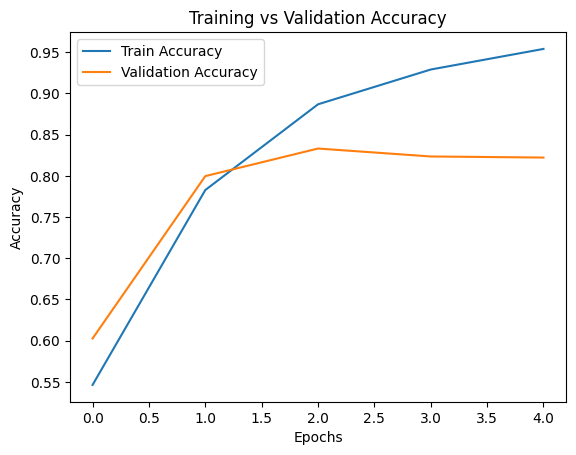

1/1 [==============================] - 0s 360ms/step

Review:
? please give this one a miss br br kristy swanson and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite lacklustre so all you madison fans give this a miss ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?

Predicted Sentiment: Positive


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
from keras.utils import to_categorical

# Load IMDB dataset from Keras (only keep the top 20,000 most frequent words)
max_features = 20000
maxlen = 100  # max length of each review
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences to ensure equal length
x_train = pad_sequences(x_train, maxlen=maxlen, padding='post')
x_test = pad_sequences(x_test, maxlen=maxlen, padding='post')

# Convert labels to categorical (positive=1, negative=0 → one-hot)
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

# Build RNN model
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=5, input_length=maxlen))
model.add(SimpleRNN(32))
model.add(Dense(2, activation='softmax'))

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

# Plot training accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

# Function to decode a sequence back to words
word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

def decode_review(sequence):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in sequence])

# Predict sentiment on a new review (example from test set)
sample_idx = 0
sample_review = x_test[sample_idx].reshape(1, maxlen)
prediction = model.predict(sample_review)
predicted_class = np.argmax(prediction)

print("\nReview:")
print(decode_review(x_test[sample_idx]))
print("\nPredicted Sentiment:", "Positive" if predicted_class == 1 else "Negative")
